In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\My Projects\Data-Cleaning-using-python\bhp.csv")

In [3]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


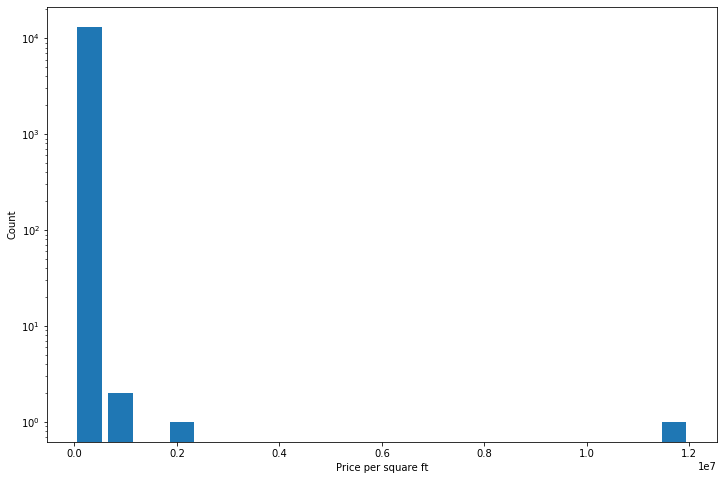

In [44]:
plt.hist(data.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [4]:
data.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [6]:
min_threshold,max_threshold = data.price_per_sqft.quantile([0.001,0.999])
min_threshold,max_threshold 


(1366.184, 50959.36200000099)

In [42]:
#Using standard deviation to remove outliers

In [14]:
data_outliers = data[(data.price_per_sqft>min_threshold) & (data.price_per_sqft<max_threshold)]
data_outliers.shape

(13172, 7)

In [15]:
upper_limit = data_outliers.price_per_sqft.mean() + 4*data_outliers.price_per_sqft.std()
upper_limit

23227.73653589429

In [16]:
lower_limit = data_outliers.price_per_sqft.mean() - 4*data_outliers.price_per_sqft.std()
lower_limit

-9900.429065502549

In [18]:
data_outliers1 = data_outliers[(data_outliers.price_per_sqft>lower_limit) & (data_outliers.price_per_sqft<upper_limit)]
data_outliers1.shape

(13047, 7)

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

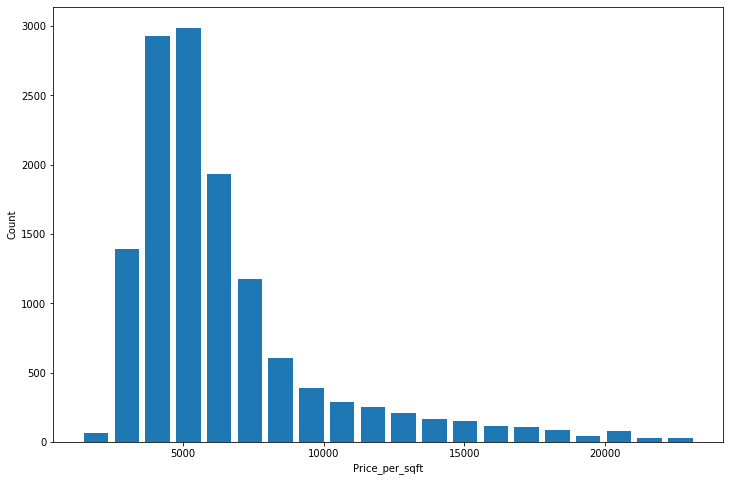

In [27]:
plt.hist(data_outliers1.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price_per_sqft')
plt.ylabel('Count')
plt.show()

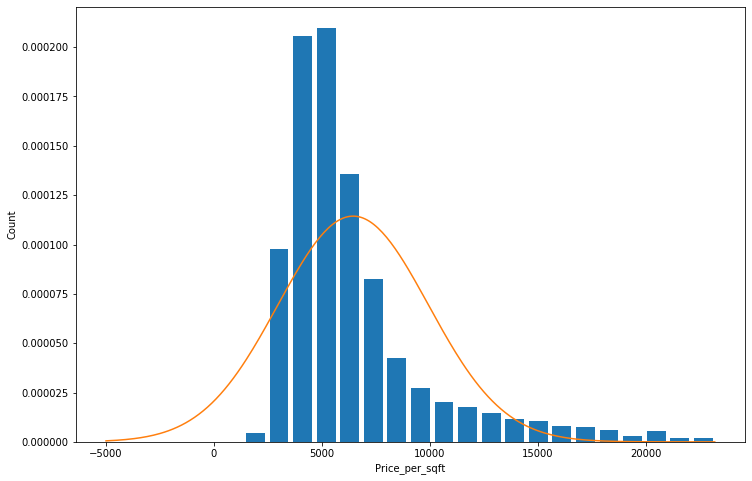

In [30]:
from scipy.stats import norm
plt.hist(data_outliers1.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price_per_sqft')
plt.ylabel('Count')

rng = np.arange(-5000, data_outliers1.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,data_outliers1.price_per_sqft.mean(),data_outliers1.price_per_sqft.std()))

In [40]:
# Using Z-score to remove outliers

In [38]:
data_outliers['zscore'] = (data_outliers.price_per_sqft - data_outliers.price_per_sqft.mean())/data_outliers.price_per_sqft.std()
data_outliers.head()

C:\Users\dkjai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [39]:
new_data = data_outliers1[(data_outliers.zscore>-4) & (data_outliers.zscore<4)]
new_data.shape

C:\Users\dkjai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(13047, 9)